## Install and load all the required packages first

### install

In [1]:
#install.packages('IRkernel') 
# install.packages("rlang", type="binary",dependencies = TRUE)
# install.packages("magrittr", type="binary",dependencies = TRUE) # package installations are only needed the first time you use it
# install.packages("dplyr", type="binary",dependencies = TRUE)    # alternative installation of the %>%
# install.packages("tidyquant", type="binary",dependencies = TRUE)
# install.packages("lubridate", type="binary",dependencies = TRUE)
# install.packages("PerformanceAnalytics", type="binary",dependencies = TRUE)
# install.packages("xts", type="binary",dependencies = TRUE)
# install.packages("ggplot2", type="binary",dependencies = TRUE)
# install.packages("broom", type="binary",dependencies = TRUE)
# install.packages("tidyverse", type="binary",dependencies = TRUE)
# install.packages('timetk', type="binary",dependencies = TRUE)

In [2]:
# remove.packages("rlang")
# install.packages("magrittr") # package installations are only needed the first time you use it
# install.packages("dplyr")    # alternative installation of the %>%
# install.packages("tidyquant")
# install.packages("lubridate")
# install.packages("PerformanceAnalytics")
# install.packages("xts")
# install.packages("ggplot2")
# install.packages("broom")
# install.packages("tidyverse")
# install.packages("timetk")

### load the required packages

In [4]:
# library(rlang)
library(magrittr) # needs to be run every time you start R and want to use %>%
library(ggplot2)
library(dplyr)    # alternatively, this also loads %>%
library(tidyquant)
library(tidyverse)
library(lubridate)
library(PerformanceAnalytics)
library(xts)
library(timetk)

## Function to evalute the portfolio return based on the indecies and corresponding weights

#### From 2012 to 2022 (10 years period)

In [5]:
portfolio_return <- function(Indecies, wts){
    stock_prices <- tq_get(Indecies , get  = "stock.prices")
    stock_returns_monthly <- stock_prices %>% group_by(symbol) %>% tq_transmute(select = adjusted,mutate_fun = periodReturn, period     = "monthly", col_rename = "Ra")
    portfolio_returns_monthly <- stock_returns_monthly %>% tq_portfolio(assets_col  = symbol, returns_col = Ra, weights = wts, col_rename  = "Ra")
    return(portfolio_returns_monthly)
}

#### Backward extrapolation to map it from 1976 to 2022

In [6]:
portfolio_return_extrapolation <- function(Indecies, wts){
    stock_prices <- tq_get(Indecies , get  = "stock.prices")
    stock_returns_monthly <- stock_prices %>% group_by(symbol) %>% tq_transmute(select = adjusted,mutate_fun = periodReturn, period     = "monthly", col_rename = "Ra")
    portfolio_returns_monthly <- stock_returns_monthly %>% tq_portfolio(assets_col  = symbol, returns_col = Ra, weights = wts, col_rename  = "Ra")
    # Backward extrapolation
    prm <- portfolio_returns_monthly
    prm1 <- prm
    prm1$date <- prm1$date %m-% months(107)
    prm2 <- prm1
    prm2$date <- prm2$date %m-% months(107)
    prm3 <- prm2
    prm3$date <- prm3$date %m-% months(107)
    prm4 <- prm3
    prm4$date <- prm4$date %m-% months(107)
    prm_new <- rbind(prm,prm1,prm2,prm3,prm4)

    return(prm_new)
}

## Function to plot the return, and estimate cumulative return, and current investment

#### This function returns a plot of cumulative return, cumulative return, current investment, and Sharp Ratio

In [8]:
portfolio_cum_return <- function(portfolio_returns_monthly, Initial_investment, Rf){
    portfolio_returns_monthly<- portfolio_returns_monthly[order(portfolio_returns_monthly$date),]
    #create an xts dataset  
    All.dat <- xts(portfolio_returns_monthly[,-1], order.by = portfolio_returns_monthly$date) 
    #Calculate Compound Return for the fund across all the data  
    Return.cumulative(All.dat$Ra,geometric = TRUE) 
    cum_ret <- Return.cumulative(All.dat$Ra,geometric = TRUE)[1]
    p.plot <- chart.CumReturns(All.dat$Ra,wealth.index = FALSE, geometric = TRUE)  
    current_investment = Initial_investment * (1+cum_ret) 
    # Sharpe <- SharpeRatio(All.dat$Ra, All.dat$Risk.Free)
    Sharpe <- SharpeRatio(All.dat$Ra, Rf)
    return(c(p.plot, cum_ret, current_investment, Sharpe[1,]))
}

### Input parameter, for the amound of money invested initiallly and Risk-free return

In [9]:
Initial_investment = 10000
Rf = 0.01/12 # e.g. (0 or 0.01/12)

# Factor-based Strategy

#### From 2012 to 2022

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 2.120246

[[3]]
[1] 31202.46

[[4]]
[1] 0.2571454


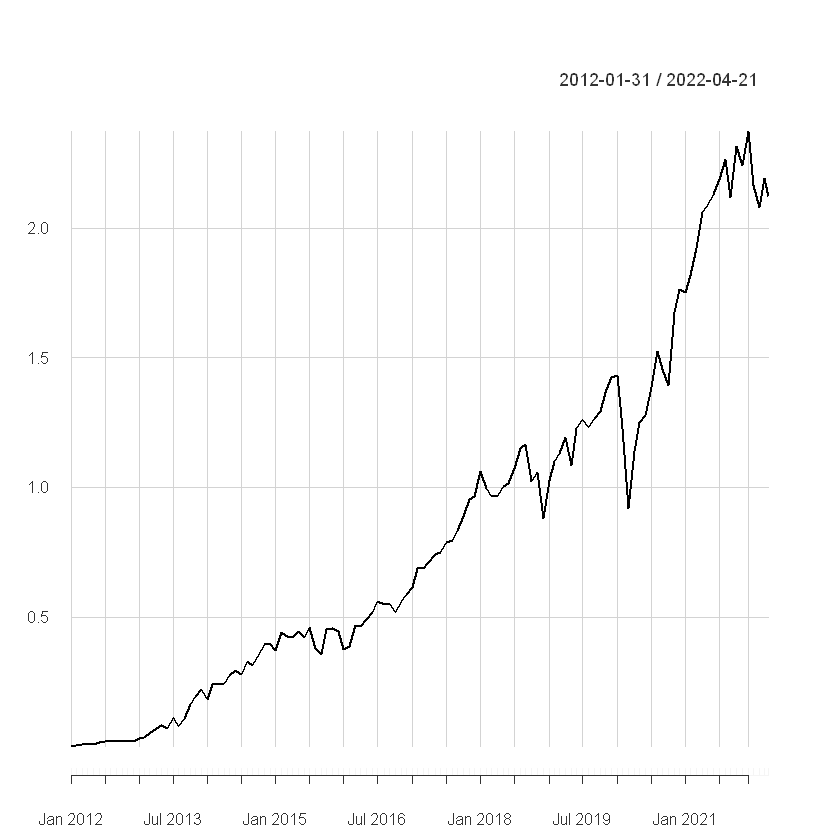

In [10]:
Indecies <- c("SIZE","VLUE","MTUM","USMV","QUAL")
wts <- c(0.2, 0.2, 0.2, 0.2, 0.2)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

### From 1976 to 2022

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 294.7632

[[3]]
[1] 2957632

[[4]]
[1] 0.2579804


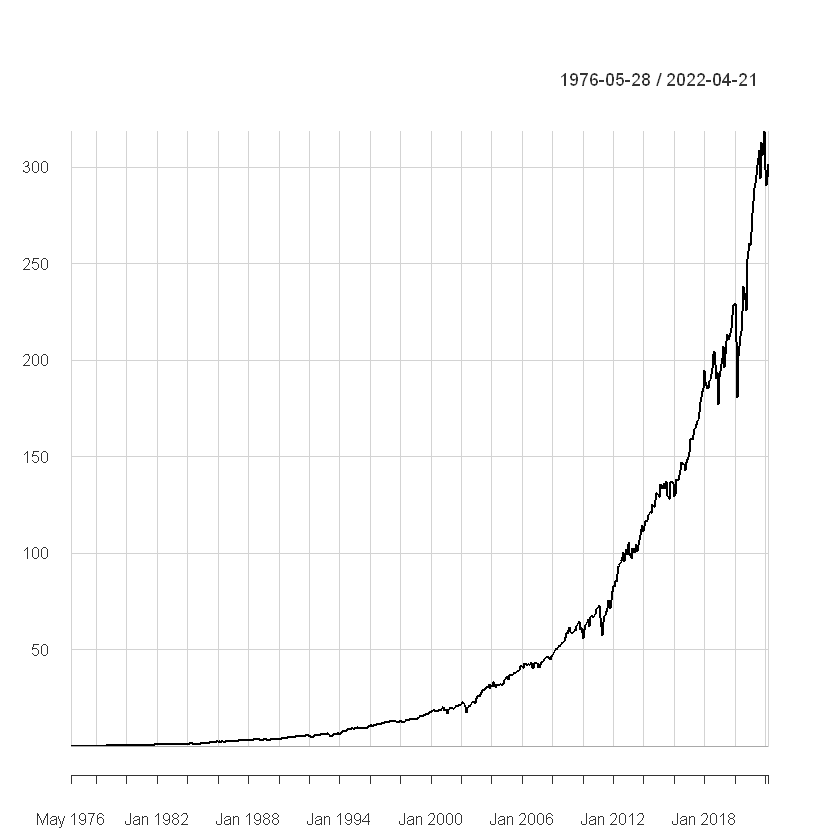

In [11]:
Indecies <- c("SIZE","VLUE","MTUM","USMV","QUAL")
wts <- c(0.2, 0.2, 0.2, 0.2, 0.2)
res <- portfolio_return_extrapolation(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

# Barbell Strategy

#### From 2012 to 2022

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 1.254434

[[3]]
[1] 22544.34

[[4]]
[1] 0.2275447


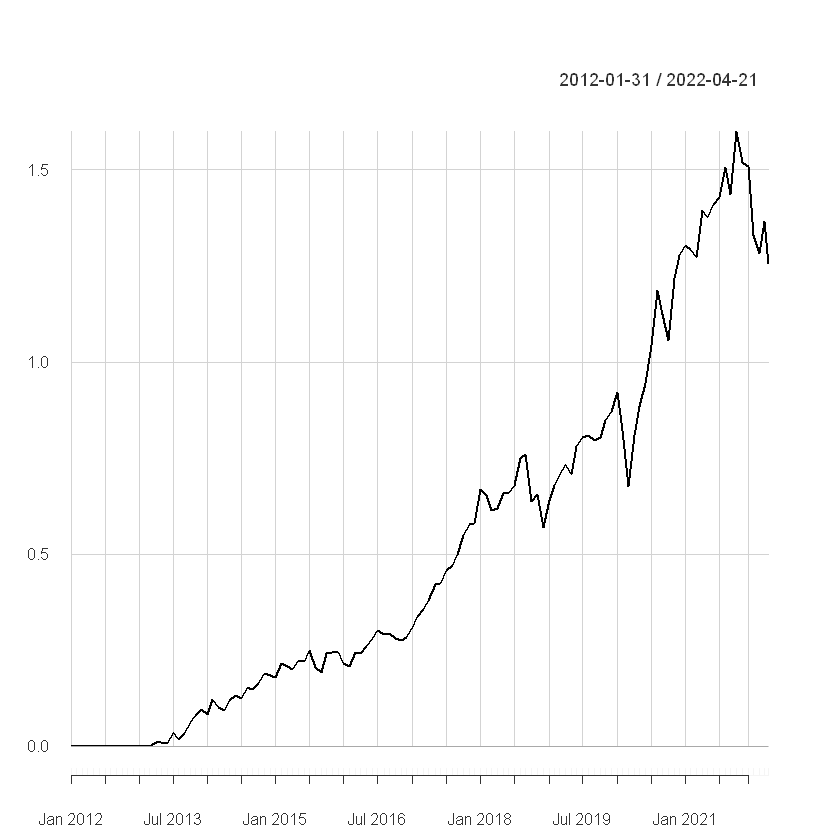

In [12]:
# SHV is ishares short treasury bond etf
Indecies <- c("SHV","MTUM")
wts <- c(0.5, 0.5)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

#### From 1976 to 2022

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 57.23547

[[3]]
[1] 582354.7

[[4]]
[1] 0.2282836


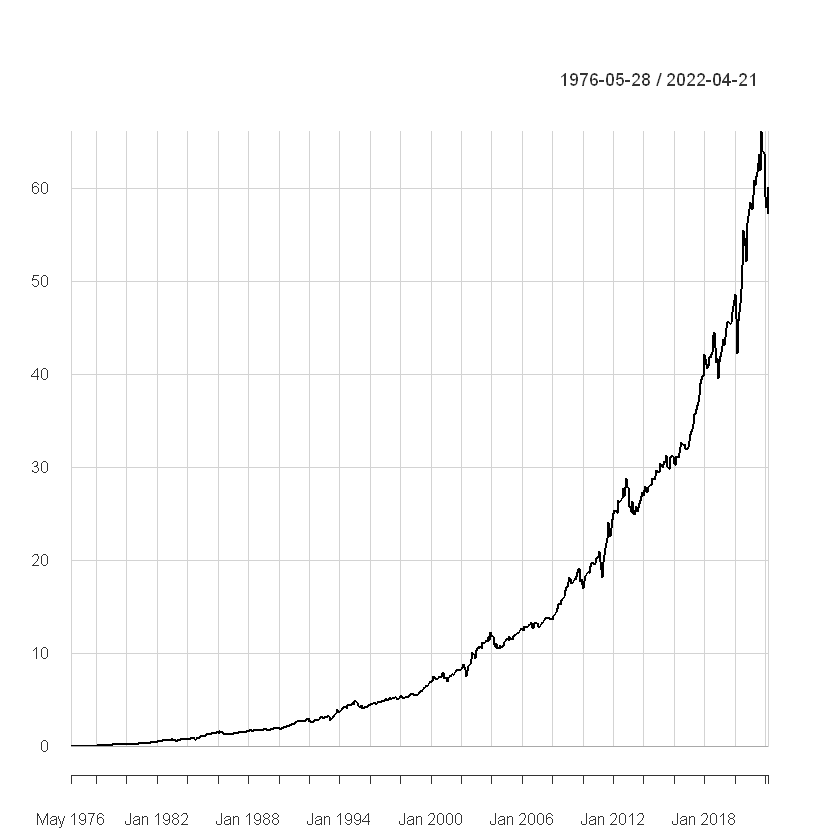

In [13]:
# SHV is ishares short treasury bond etf
Indecies <- c("SHV","MTUM")
wts <- c(0.5, 0.5)
res <- portfolio_return_extrapolation(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

# 50% Barbell + 50% Factor-based

#### From 2012 to 2022

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 1.68734

[[3]]
[1] 26873.4

[[4]]
[1] 0.2500343


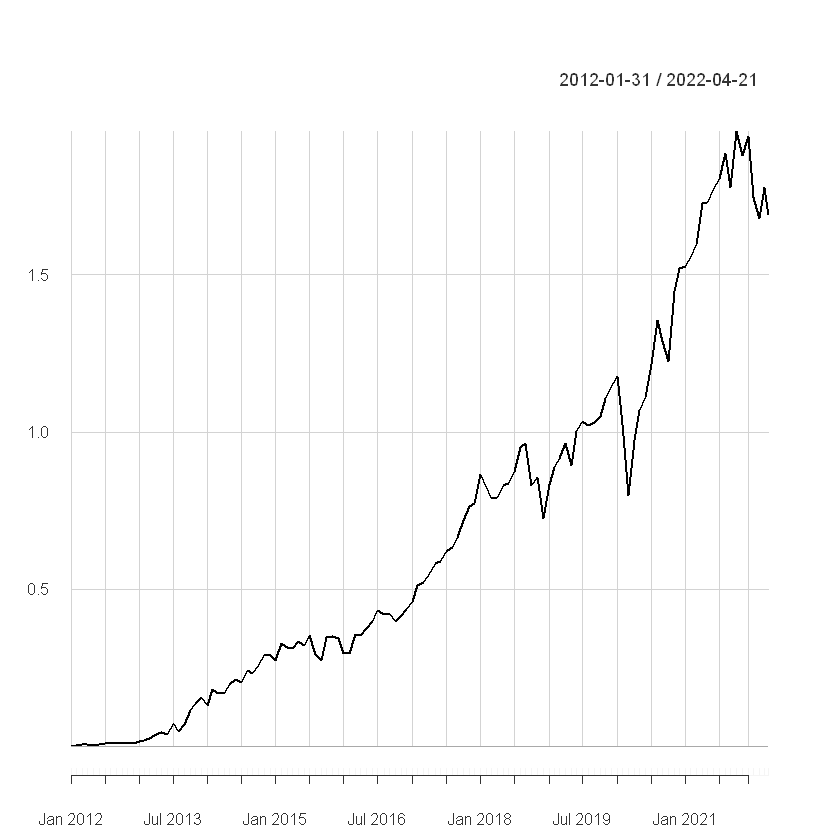

In [14]:
Indecies <- c("SIZE","VLUE","USMV","QUAL","MTUM","SHV")
wts <- c(0.1, 0.1, 0.1, 0.1, 0.35, 0.25)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

#### From 1976 to 2022

Warning message in PerformanceAnalytics::Return.portfolio(., weights = weights, :
"NA's detected: filling NA's with zeros"


[[1]]

[[2]]
[1] 139.1564

[[3]]
[1] 1401564

[[4]]
[1] 0.2508461


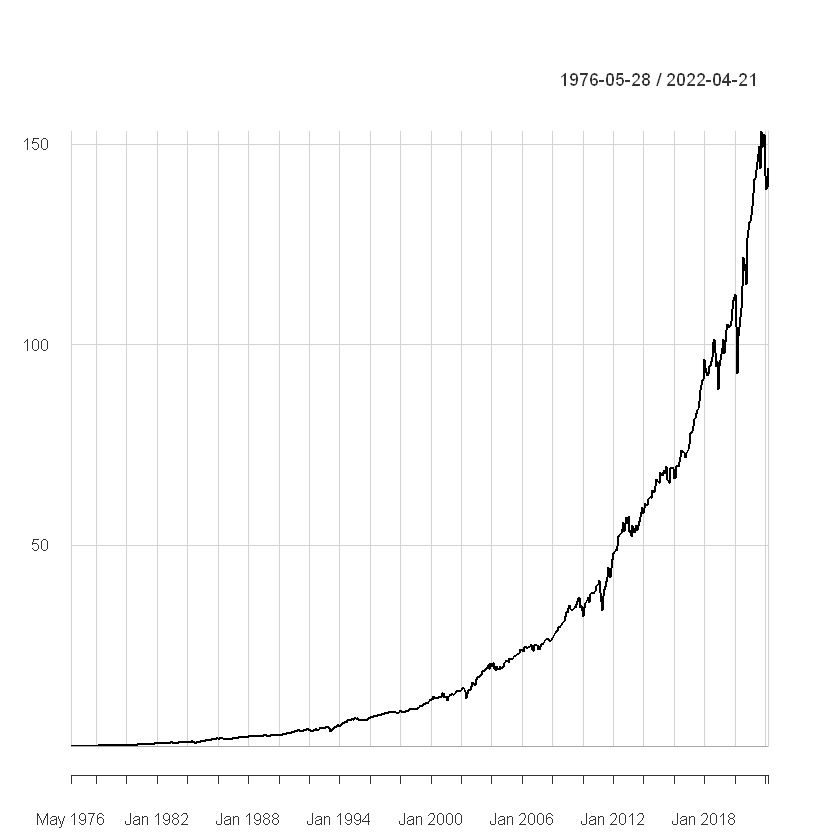

In [15]:
Indecies <- c("SIZE","VLUE","USMV","QUAL","MTUM","SHV")
wts <- c(0.1, 0.1, 0.1, 0.1, 0.35, 0.25)
res <- portfolio_return_extrapolation(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

# SP500

#### From 2012 to 2022

[[1]]

[[2]]
[1] 3.173955

[[3]]
[1] 41739.55

[[4]]
[1] 0.3027931


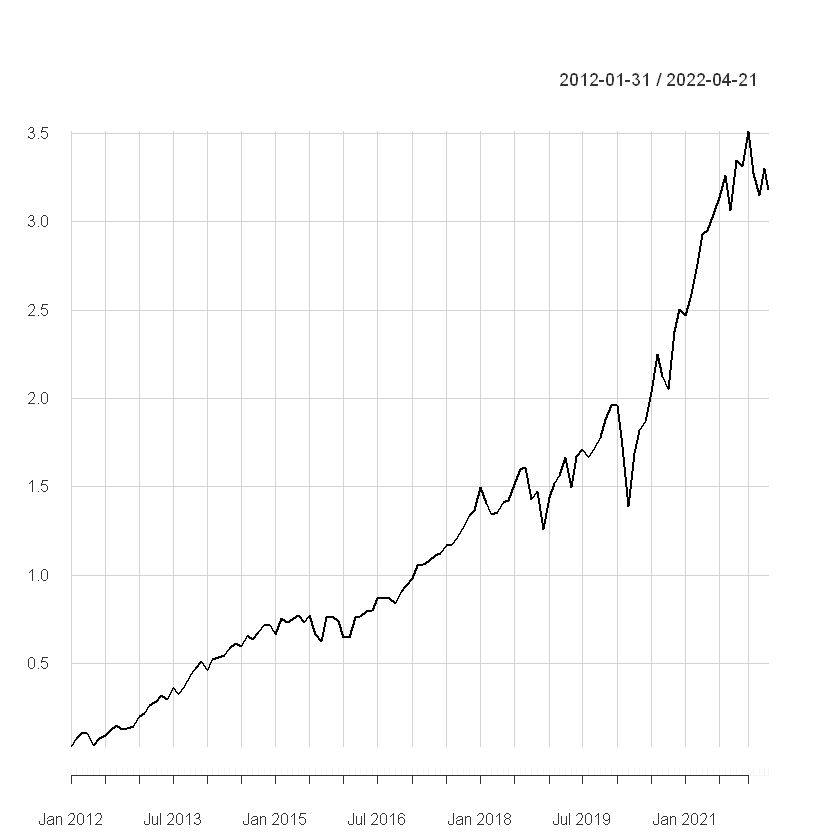

In [16]:
Indecies <- c("SPY")
wts <- c(1)
res <- portfolio_return(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)

#### From 1976 to 2022

[[1]]

[[2]]
[1] 1265.889

[[3]]
[1] 12668892

[[4]]
[1] 0.303776


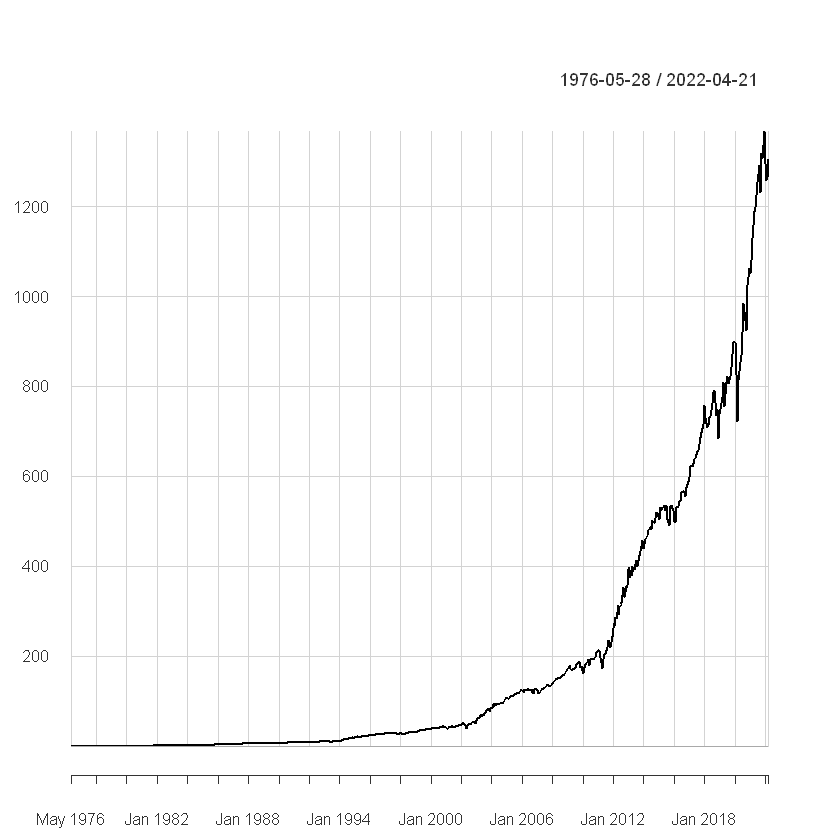

In [17]:
Indecies <- c("SPY")
wts <- c(1)
res <- portfolio_return_extrapolation(Indecies, wts)
portfolio_cum_return(res, Initial_investment, Rf)